In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [3]:
def file_load(ticker):
    file = f'/Users/brendan/Desktop/Python/BoostedAI/quarterly_data/{ticker}.csv'
    df = pd.read_csv(file)
    df = df.rename({'Unnamed: 0':'Date'}, axis=1)
    df = df.iloc[:50, :]
    return df

In [4]:
file_load('CRM').head()

,Date,Calendar_Year,Quarter,Mkt Cap,Debt to Equity,Debt to Assets,Revenue per Share,NI per Share,outstandingShares,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,Cash,Receivables,Inventory,Cur Assets,Tax Assets,LT Assets,Int Assets,Total Assets,Payables,Deferred Revenue Current,Deferred Revenue LongTerm,Cur Liab,LT Debt,LT Liab,Total Liab,SH Equity,cash_flow Operations,cash_flow Investing,cash_flow Financing,CAPEX,Fcash_flow,Dividends Paid,Gross Profit Margin,Op Margin,Int Coverage,Net Profit Margin,Dividend Yield,Current Ratio,Operating Cycle,Days of AP Outstanding,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,Price To FCF,PEG,EPS,Ticker
0,2022-06-25,2023,Q1,"174,356.54",0.21,0.37,7.48,0.03,"1,001.00","7,411.00","5,366.00","1,318.00","5,346.00",20.00,28.00,"6,859.00","3,952.00",0.00,"20,411.00",0.00,"72,611.00","8,559.00","93,022.00","4,603.00","13,636.00",0.00,"19,899.00","12,325.00","14,247.00","34,146.00","58,876.00","3,676.00","-2,457.00",201.00,-179.00,"3,497.00",0.00,0.72,0.00,NaN,0.00,NaN,1.03,47.99,202.58,-154.58,0.00,0.00,0.00,"1,556.75",23.53,2.96,49.86,"220,392.00",0.03,CRM
1,2022-03-26,2022,Q4,"229,373.18",0.23,0.39,7.43,-0.03,986.00,"7,326.00","5,312.00","1,291.00","5,488.00",-176.00,-28.00,"5,464.00","9,739.00",0.00,"22,850.00","2,623.00","72,359.00","8,978.00","95,209.00",0.00,"15,628.00",0.00,"21,788.00","13,295.00","15,290.00","37,078.00","58,131.00","1,982.00","-1,459.00",203.00,-167.00,"1,815.00",0.00,0.73,-0.02,NaN,-0.00,NaN,1.05,119.64,0.00,119.64,-0.00,-0.00,-0.00,"-2,047.97",31.31,3.95,126.38,19.28,-0.03,CRM
2,2021-12-25,2022,Q3,"296,704.80",0.23,0.35,7.00,0.48,"1,001.00","6,863.00","5,019.00","1,203.00","4,981.00",38.00,468.00,"4,753.00","4,019.00",0.00,"15,957.00","2,525.00","71,479.00","9,472.00","87,436.00",0.00,"10,116.00",0.00,"15,035.00","13,313.00","15,347.00","30,382.00","57,054.00",404.00,-976.00,-970.00,-166.00,238.00,0.00,0.73,0.01,NaN,0.07,NaN,1.06,52.70,0.00,52.70,0.01,0.01,0.00,158.50,43.23,5.20,"1,246.66",-10.04,0.48,CRM
3,2021-09-25,2022,Q2,"225,720.69",0.24,0.37,6.80,0.57,950.00,"6,340.00","4,727.00","1,020.00","4,395.00",332.00,535.00,"6,299.00","4,074.00",0.00,"16,256.00","2,794.00","72,402.00","9,746.00","88,658.00","4,274.00","11,067.00",0.00,"17,393.00","13,467.00","15,745.00","33,138.00","55,520.00",386.00,"-11,054.00","8,440.00",-213.00,173.00,0.00,0.75,0.05,NaN,0.08,NaN,0.93,57.83,238.47,-180.64,0.01,0.01,0.00,105.48,35.60,4.07,"1,304.74",8.97,0.57,CRM
4,2021-06-26,2022,Q1,"212,124.72",0.13,0.34,6.47,0.51,940.00,"5,963.00","4,408.00",951.00,"4,054.00",354.00,469.00,"8,544.00","3,174.00",0.00,"20,444.00","2,641.00","44,441.00","3,925.00","64,885.00","3,439.00","11,158.00",0.00,"15,323.00","5,406.00","6,995.00","22,318.00","42,567.00","3,228.00","-1,047.00",165.00,-171.00,"3,057.00",0.00,0.74,0.06,NaN,0.08,NaN,1.33,47.91,199.04,-151.14,0.01,0.01,0.01,113.07,35.57,4.98,69.39,1.49,0.51,CRM


In [5]:
def common_size(ticker):
    df = file_load(ticker)
    df['Gross Margin %'] = df['Gross Profit']/df['Revenue'] * 100
    df['R&D % Rev'] = df['R&D Expenses']/df['Revenue'] * 100
    df['Op Expenses % Rev'] = df['Op Expenses'] / df['Revenue'] * 100
    df['EBIT Margin %'] = df['Op Income'] / df['Revenue'] * 100
    df['Net Margin %'] = df['Net Income'] / df['Revenue'] * 100
    df['OCF Margin %'] = df['cash_flow Operations'] / df['Revenue'] * 100
    df['FCF Margin %'] = df['Fcash_flow']/df['Revenue'] * 100
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return df[['Date','Calendar_Year', 'Quarter', 'Mkt Cap','Revenue','Gross Margin %',
              'R&D % Rev', 'Op Expenses % Rev', 'EBIT Margin %','Net Margin %',
              'OCF Margin %','FCF Margin %']]

In [6]:
def common_size_growth(ticker):
    df = file_load(ticker)
    df = common_size(ticker)
    df['Rev % YoY'] = ((-df.groupby('Quarter')[['Revenue']].diff()['Revenue']).shift(-4).fillna(0))/df['Revenue']*100
    df['GM % bps YoY'] = ((-df.groupby('Quarter')[['Gross Margin %']].diff()['Gross Margin %']).shift(-4).fillna(0))*100
    df['EBIT % bps YoY'] = ((-df.groupby('Quarter')[['EBIT Margin %']].diff()['EBIT Margin %']).shift(-4).fillna(0))*100
    df['Net Margin % bps YoY'] = ((-df.groupby('Quarter')[['Net Margin %']].diff()['Net Margin %']).shift(-4).fillna(0))*100
    return df

In [7]:
def common_size_plot(ticker, line_item):
    df = common_size_growth(ticker)
    df_plot = df[['Date', 'Calendar_Year', 'Quarter','Rev % YoY','GM % bps YoY','EBIT % bps YoY']].set_index(['Date'])
    df_plot = df_plot[::-1]
    df_plot = df_plot[4:]
    df_plot  = df_plot.round(1)
    return df_plot


In [8]:
len(common_size_plot('CRM','Rev % YoY'))

46

In [9]:
def plot_initial(ticker, line_item):
    df = common_size_plot(ticker, line_item)
    fig, ax = plt.subplots()
    df.plot(kind='bar', y=f'{line_item} YoY', figsize=(14,8), ax=ax)
    plt.title(label=f"{ticker} {line_item} YoY",
          fontsize=40,
          color="red",pad=3.0)
    ax.set_xticklabels([x.strftime("%m") for x in df.index], rotation=45)
    ax.tick_params(axis='x', which='major', labelsize=8)


    def add_value_label(x_list,y_list):
        for i in range(1, len(x_list)):
            plt.text(i,y_list[i],y_list[i], ha="center")

    x_list = list(df.index.values) 
    y_list = df[f'{line_item} YoY']
        
    add_value_label(x_list, y_list)
    
    # 2011
    ax.axvline(x=3.25,ls='--',label='2012',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value = 3
    ax.annotate(text='2012', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    # 2012
    ax.axvline(x=7.25,ls='--',label='2013',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=7
    ax.annotate(text='2013', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)


    # 2013
    ax.axvline(x=11.25,ls='--',label='2014',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=11
    ax.annotate(text='2014', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    # 2014
    ax.axvline(x=15.25,ls='--',label='2015',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=15
    ax.annotate(text='2015', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    # 2015
    #
    ax.axvline(x=19.25,ls='--',label='2016', color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=19
    ax.annotate(text='2016', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2016

#
    ax.axvline(x=23.25,ls='--',label='2017',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=23
    ax.annotate(text='2017', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2017
#
    ax.axvline(x=27.25,ls='--',label='2018',color='black',lw=1.25)
    x_bounds = ax.get_xlim()
    vline_value=27
    ax.annotate(text='2018', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)


    #2018
    #
    ax.axvline(x=31.25,ls='--',label='2019',color='black', lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=31
    ax.annotate(text='2019', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2019
    #
    ax.axvline(x=35.25,ls='--',label='2020',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=35
    ax.annotate(text='2020', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2020
#
    ax.axvline(x=39.25,ls='--',label='2021',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=39
    ax.annotate(text='2021', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

#2021
#
    ax.axvline(x=43.25,ls='--',label='2022',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=43
    ax.annotate(text='2022', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)
    plt.show()

In [10]:
# oh l'Rev % YoY','GM % bps YoY','EBIT % bps YoY'

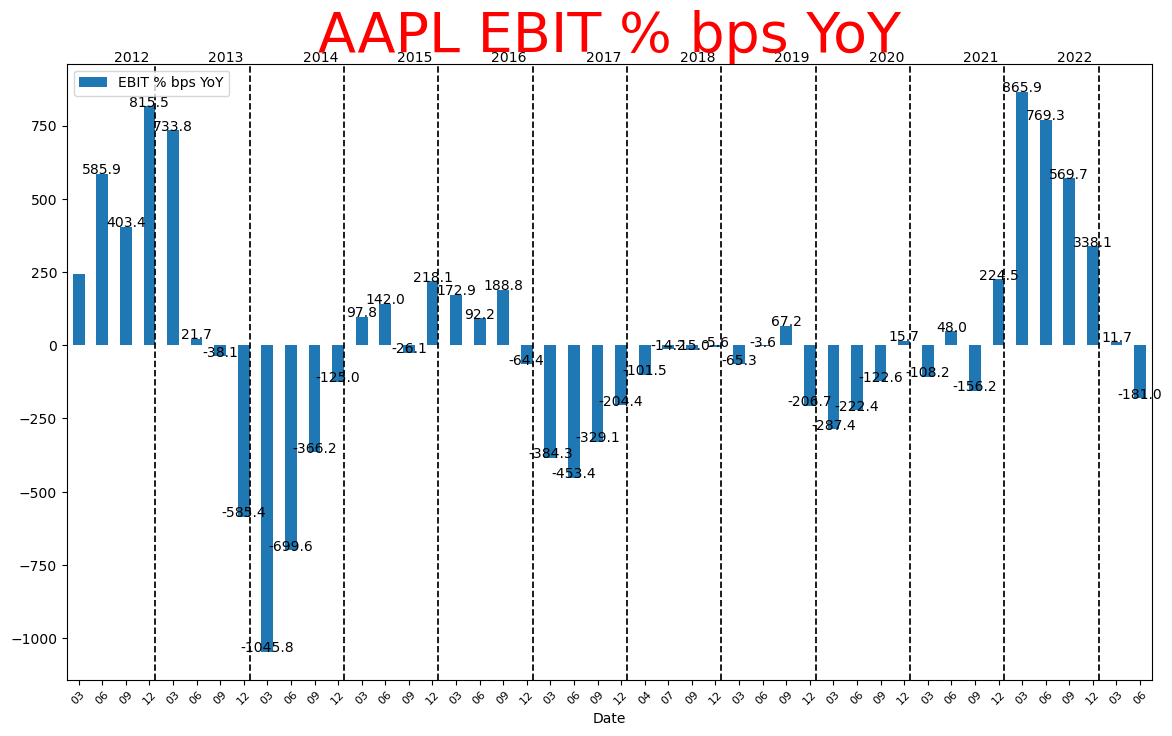

In [15]:
plot_initial('AAPL', 'EBIT % bps')

# Rev %
# GM % bps
# EBIT % bps

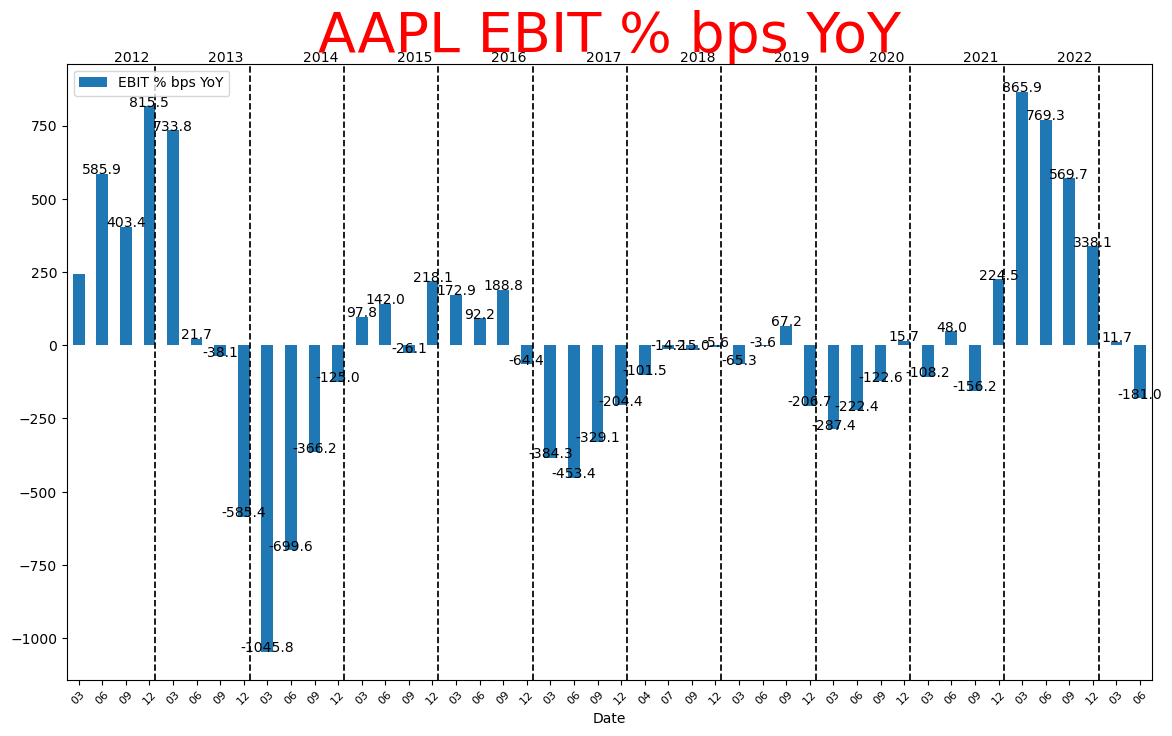

In [14]:
plot_initial('AAPL', 'EBIT % bps')
# Rev %
# GM % bps
# EBIT % bps

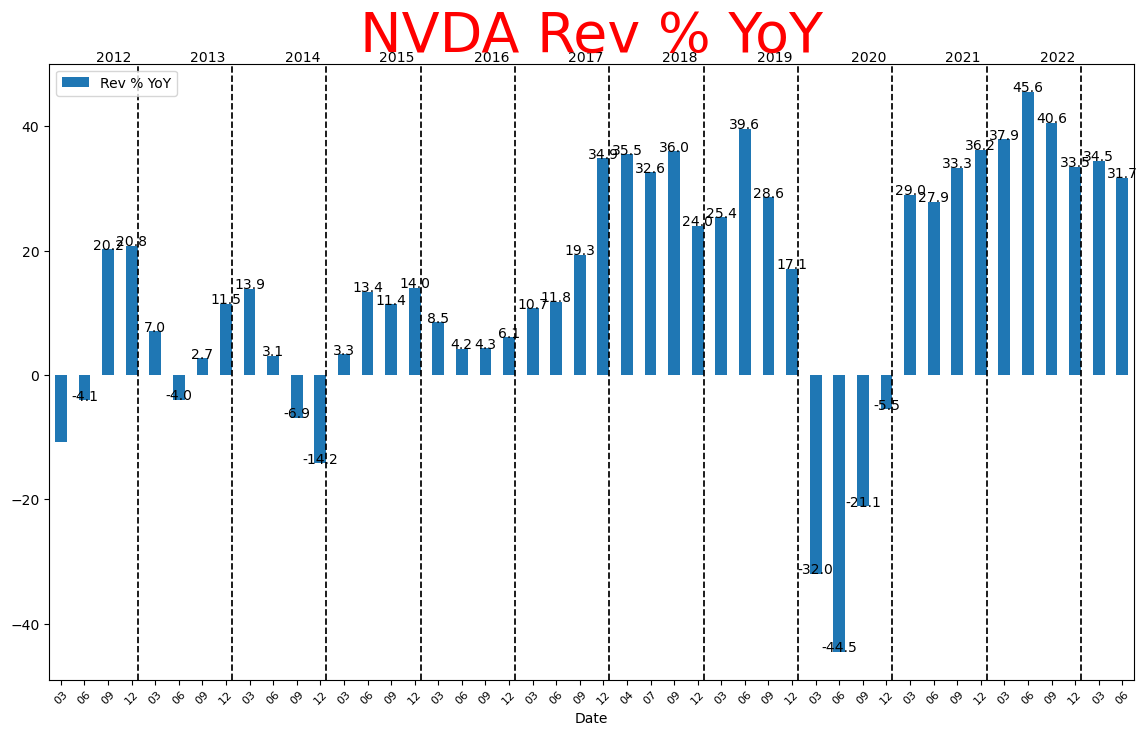

In [13]:

plot_initial('NVDA','Rev %') 